# <center>BAYESIAN THEOREM</br><i>For Continuous Events</i></center>
---
# I. Nhắc lại Bayesian cho discrete events:

$$ P(A_1|B) = \frac{P(B|A_1)\times P(A_1)}{P(B)} $$

$$ \begin{align}
P(B) =& P(B|A_1)P(A_1) + P(B|A_2)P(A_2) + \dots + P(B|A_n)P(A_n)\\
\text{or}\: P(B) =& \sum_{i=1}^{n}P(B|A_n)P(A_n)
\end{align}$$

**Điều kiện:** 
- Các events $A_i$ mutually exclusive 
- $\sum_{i=1}^{n}P(A_i)=1$

---
# II. Bayesian for continuous events:
Cho một biến số theo một phân phối nào đó có PDF = $ f(\theta)$, thì với điều kiện y thì $ f(\theta | y) $ là:  

$$ f(\theta|y) = \frac{f(y|\theta)f(\theta)}{f(y)} =  \frac{f(y|\theta)f(\theta)}{\int{f(y|\theta)f(\theta)d\theta}}$$

**Bayesian có thể ngôn ngữ hóa như sau:**  

$$ \text{Posterior} = \frac{\text{Likelihood} \times \text{Prior}}{\text{Normalizing Constant}} $$
- $ f(\theta|y)$: posterior  
    Là PDF của phân phối sau khi được likelihood update cho Prior
- $ f(y|\theta)$: likelihood  
- $ f(\theta)$: prior  
    Là phân phối của $\theta$ trước khi update.  
    Nếu chưa có thì có thể dùng Uniform(0,1)
- $ f(y)$: normalizing constant  
    thường bằng 1 hoặc một hằng số nào đó .  
    Cho nên hình dạng posterior distribution không phụ thuộc vào nó

Ta có thể viết lại như sau ( $\propto$ là `proportion to`; tỉ lệ thuận, đồng dạng )  
$$ \text{Posterior} \propto (\text{Likelihood} \times \text{Prior}) $$

---
# III. Nói về Likelihood
##  Một số quy ước Toán học:

- Hàm Sum:  
    - $ \sum_{x=1}^n x_i = x_1 + x_2 + \dots + x_n $
- Hàm tích: (đọc là Pie)  
    - $ \Pi_{x=1}^n x_i = x_1\cdot x_2\dots x_n$
    - Ví dụ: $ n! = \Pi_{i=1}^n i $
- Phép mũ:  
    - $ a^x a^y = a^{x+y} \quad (a^x)^y = a^{xy} $
- Hàm exp:  
    - $ \exp(x) = e^x $
    - $e^x$ luôn >0
    - Ví dụ: $\Pi_{x=1}^{5} e^x = \exp(\sum_{x=1}^{5} x) = e^{15} $
- Hàm log:  
    - Natural logarithm: $\log_e(y) =\log(y)$
    - y phải luôn >0
    - $\log(x\cdot y)=\log(x) + \log(y) \quad log(\frac{x}{y}) = \log(x) - \log(y)$  
    - $\log(x^b) = b\log(x) \quad \log(1)=0$
    - Hàm log(f(x)) là hàm cùng chiều với hàm f(x), Nghĩa là tim max(f(x)) tương đương tìm max(log(f(x))), điều này rất khi có lợi khi tìm đạo hàm của f(x) là tích, khi chuyển sang log(f(x)) là tổng.
- Hàm argmax:  
    - Max của f(x) là max(f(x))
    - Khi đó giá trị x đó gọi là argmax(f(x))
    - Ví dụ: 
        - $f(x) = \exp(-x^2) $ => $ log(f(x))=-x^2$ max log(f(x))=0 khi x=0=argmax
        - Vậy argmax f(x) = 0; max f(x) = 1

## Likelihood function 
là hàm xác suất của params khi cho dataset.  
Ví dụ: dataset X theo phân phối có PDF = f(x) có params là $\theta$  
thì likelihood function = L($\theta$ | X) = $\Pi_{x=1}^{n} \text{PDF}(x)$  

Ví dụ 2: 1 đồng xu chưa biết p(head)=params, dataset là: 

In [113]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
# Giả lập 1 đồng xu tung 15 lần có dataset như sau, với head=1
np.random.seed(1001)
data = np.random.randint(0,2,15)
data

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1])

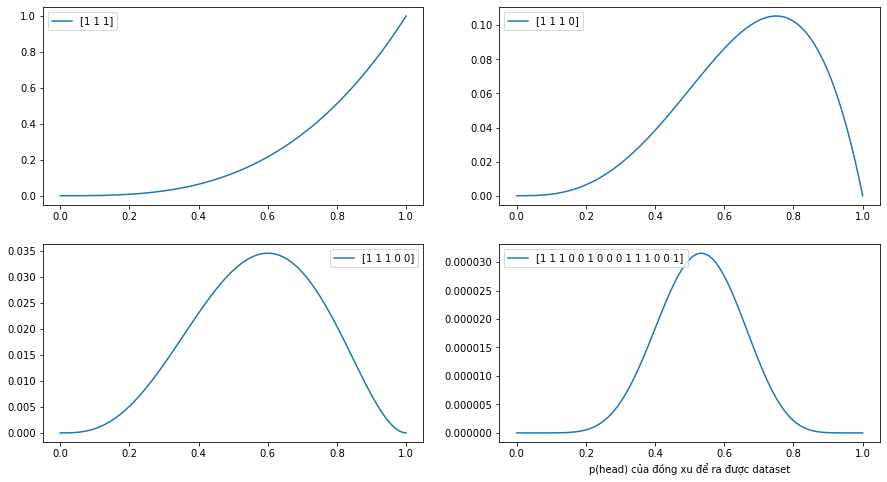

In [127]:
# vẽ likelihood function
params = np.linspace(0,1,100)

fig, ax = plt.subplots(2,2, figsize=(15,8))

for partial_data, sub_ax in zip([data[:3], data[:4], data[:5], data], ax.ravel() ):
    n = partial_data.size
    k = partial_data.sum()
    sub_ax.plot(params,
                ((params**k)*((1-params)**(n-k))) ,   # likelihood function cho bernoulli
                label=partial_data)
    sub_ax.legend();

ax[1,1].set_xlabel("p(head) của đồng xu để ra được dataset");

## Maximum likelihood estimation (MLE)
là phương pháp tính ra cụ thể params sao cho xác suất xảy ra dataset là cao nhất dựa trên likelihood.  
Với ví dụ trên thì MLE là đỉnh của đồ thị ~ 0.55.   

Ta có thể dùng toán học để tìm nó, bằng cách dùng đạo hàm để tìm cực trị.  
( Find the critical value using calculus).  
Tuy nhiên đạo hàm thường khó: như $(UV)' = U'V + UV'$.  
Cách phố biến là dùng hàm log(likelihood), vì hàm log(f) sẽ cùng chiều  với hàm f (đã nói ở trên) nên, max của hàm log sẽ là max của hàm f. Ta tìm max bằng đạo hàm và đặt đạo hàm = zero.

---
# Dùng likelihood trong frequentist inference
**Ví dụ 1:**  
binom distribution = $ \text{PMF} = C^n_xp^x(1-p)^{n-x} $  
với dataset cố định thì n, x, $C^n_x$ là hằng số.  
bài toán là tìm p để xác suất ra dataset là lớn nhất  
=> Tìm argmax likelihood.  
=> likelihood = $p^x(1-p)^{n-x}$ với p là biến quan tâm.  
Ta có:  
loglikelihood = $ x\log(p) + (n-x)\log(1-p)$  
đạo hàm = $ \frac{x}{p} - \frac{n-x}{1-p} $  
đạo hàm =0 $ \implies \frac{x}{p} - \frac{n-x}{1-p} = 0 \implies p=\frac{x}{n} = \text{argmax}\;p^x(1-p)^{n-x} $  
khoảng tin cậy 95% của p là $p \pm 1.96\sqrt{\frac{p(1-p)}{n}}$  

**Ví dụ 2:**  
dataset $ X \sim \text{Exp}(\lambda) $  
likelihood =  $\Pi_{x=1}^{n} \lambda e^{-\lambda x} = \lambda^n e^{-\lambda \sum x}$  
loglikelihood = $ n\log(\lambda) - \lambda \sum x $  
đạo hàm = $\frac{n}{\lambda} - \sum x $   
đạo hàm =0 $ \implies \frac{n}{\lambda} - \sum x = 0 \implies \lambda=\frac{n}{\sum x} $ = 1/ trung bình  
Khoảng tin cậy 95% của $\lambda$ = $\lambda \pm 1.96\frac{1}{\lambda\sqrt{n}}$

**Thực tế**: $\overline{x}$ (trung bình của dataset) thường liên quan tới MLE của nhiều phân phối.  
Nếu A, B, C là phân phối Bernoulli(p), Poisson($\lambda$), Normal($\mu,\sigma^2$)  
Thì $\overline{x}$ là MLE cho p, $\lambda, \mu$ 